In [249]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [250]:
data=pd.read_csv("C:\\Users\\saira\\OneDrive\\Desktop\\ipbl\\Others\\Heart-Disease-Prediction-Deployment-master\\heart.csv")

In [251]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,heartdisease
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [252]:
data.isnull().sum()

age             0
sex             0
cp              0
trestbps        0
chol            0
fbs             0
restecg         0
thalach         0
exang           0
oldpeak         0
slope           0
ca              0
thal            0
heartdisease    0
dtype: int64

<Axes: >

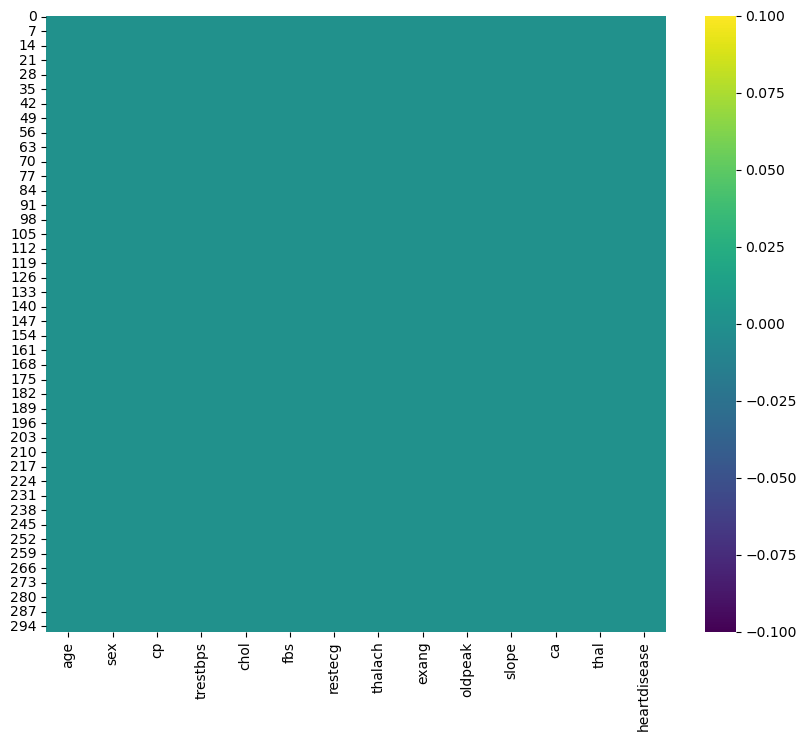

In [253]:
plt.figure(figsize=(10,8))
sns.heatmap(data.isnull(),cmap="viridis")

In [254]:
data.shape

(297, 14)

In [255]:
for column in data.columns:
    unique_counts = data[column].value_counts()
    print(unique_counts)
    print("\n")

age
58    18
57    17
54    16
59    14
60    12
51    12
56    11
52    11
44    11
62    11
64    10
41    10
63     9
67     9
61     8
55     8
45     8
42     8
65     8
46     7
48     7
50     7
43     7
66     7
53     7
49     5
47     5
70     4
68     4
39     4
35     4
69     3
71     3
40     3
34     2
37     2
76     1
29     1
74     1
38     1
77     1
Name: count, dtype: int64


sex
1    201
0     96
Name: count, dtype: int64


cp
3    142
2     83
1     49
0     23
Name: count, dtype: int64


trestbps
120    37
130    36
140    32
110    19
150    17
160    11
128    10
125    10
138    10
112     9
118     7
132     7
108     6
124     6
135     6
152     5
145     5
134     5
100     4
170     4
122     4
126     3
142     3
115     3
180     3
105     3
136     3
178     2
146     2
102     2
148     2
94      2
144     2
117     1
123     1
200     1
165     1
114     1
164     1
174     1
158     1
101     1
106     1
192     1
129     1
172     1
155     1
156

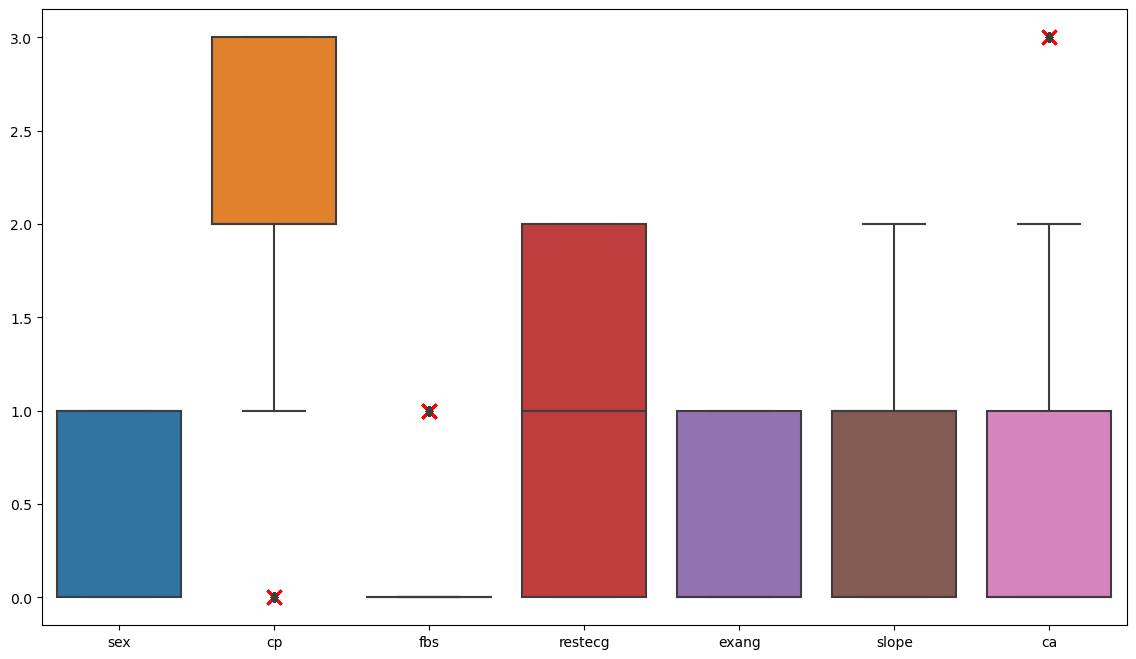

In [256]:
attributes=['sex','cp','fbs','restecg','exang','slope','ca']
plt.figure(figsize=(14, 8))
sns.boxplot(data=data[attributes], showfliers=True)
Q1 = data[attributes].quantile(0.25)
Q3 = data[attributes].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[attributes] < (Q1 - 1.5 * IQR)) | (data[attributes] > (Q3 + 1.5 * IQR)))
for i, attribute in enumerate(attributes):
    outlier_points = data.loc[outliers[attribute], attribute]
    plt.scatter(x=[i]*len(outlier_points),y=outlier_points,marker='x',color='red',s=100,label='Outliers' if i == 0 else '')
plt.show()

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           297 non-null    int64  
 1   sex           297 non-null    int64  
 2   cp            297 non-null    int64  
 3   trestbps      297 non-null    int64  
 4   chol          297 non-null    int64  
 5   fbs           297 non-null    int64  
 6   restecg       297 non-null    int64  
 7   thalach       297 non-null    int64  
 8   exang         297 non-null    int64  
 9   oldpeak       297 non-null    float64
 10  slope         297 non-null    int64  
 11  ca            297 non-null    int64  
 12  thal          297 non-null    int64  
 13  heartdisease  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [258]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [259]:
y=data['heartdisease']
x=data.drop('heartdisease',axis=1)

# train_test_split

# Logisitic regression

In [260]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
from sklearn.linear_model import LogisticRegression
lrmodel=LogisticRegression()
lrmodel.fit(x_train,y_train)
y_pred=lrmodel.predict(x_test)
lracc1=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(lracc1)
print(cm)
print(cr)

0.7333333333333333
[[23  9]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.77      0.72      0.74        32
           1       0.70      0.75      0.72        28

    accuracy                           0.73        60
   macro avg       0.73      0.73      0.73        60
weighted avg       0.74      0.73      0.73        60



C:\Users\saira\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [261]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.linear_model import LogisticRegression
lrmodel=LogisticRegression()
lrmodel.fit(x_train,y_train)
y_pred=lrmodel.predict(x_test)
lracc2=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(lracc2)
print(cm)
print(cr)

0.76
[[28 10]
 [ 8 29]]
              precision    recall  f1-score   support

           0       0.78      0.74      0.76        38
           1       0.74      0.78      0.76        37

    accuracy                           0.76        75
   macro avg       0.76      0.76      0.76        75
weighted avg       0.76      0.76      0.76        75



C:\Users\saira\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [262]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
from sklearn.linear_model import LogisticRegression
lrmodel=LogisticRegression()
lrmodel.fit(x_train,y_train)
y_pred=lrmodel.predict(x_test)
lracc3=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(lracc3)
print(cm)
print(cr)

0.8
[[37 11]
 [ 7 35]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.76      0.83      0.80        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



C:\Users\saira\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [263]:
print(lracc1)
print(lracc2)
print(lracc3)

0.7333333333333333
0.76
0.8


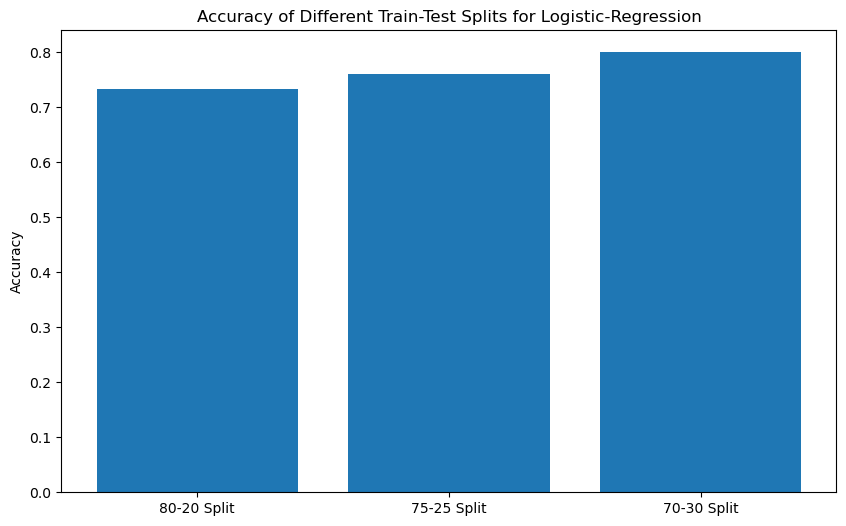

In [264]:
splits=['80-20 Split', '75-25 Split', '70-30 Split']
accuracies=[lracc1,lracc2,lracc3]
plt.figure(figsize=(10, 6))
plt.bar(splits, accuracies)
plt.title('Accuracy of Different Train-Test Splits for Logistic-Regression')
plt.ylabel('Accuracy')
plt.show()

In [265]:
acc1=max(lracc1,lracc2,lracc3)
print(acc1)

0.8


# decision tree

In [266]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtmodel=DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
y_pred=dtmodel.predict(x_test)
dtacc1=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(dtacc1)
print(cm)
print(cr)

0.7
[[22 10]
 [ 8 20]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



In [267]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtmodel=DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
y_pred=dtmodel.predict(x_test)
dtacc2=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(dtacc2)
print(cm)
print(cr)

0.6933333333333334
[[23 15]
 [ 8 29]]
              precision    recall  f1-score   support

           0       0.74      0.61      0.67        38
           1       0.66      0.78      0.72        37

    accuracy                           0.69        75
   macro avg       0.70      0.69      0.69        75
weighted avg       0.70      0.69      0.69        75



In [268]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
from sklearn.tree import DecisionTreeClassifier
dtmodel=DecisionTreeClassifier()
dtmodel.fit(x_train,y_train)
y_pred=dtmodel.predict(x_test)
dtacc3=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(dtacc3)
print(cm)
print(cr)

0.7222222222222222
[[32 16]
 [ 9 33]]
              precision    recall  f1-score   support

           0       0.78      0.67      0.72        48
           1       0.67      0.79      0.73        42

    accuracy                           0.72        90
   macro avg       0.73      0.73      0.72        90
weighted avg       0.73      0.72      0.72        90



In [269]:
print(dtacc1)
print(dtacc2)
print(dtacc3)

0.7
0.6933333333333334
0.7222222222222222


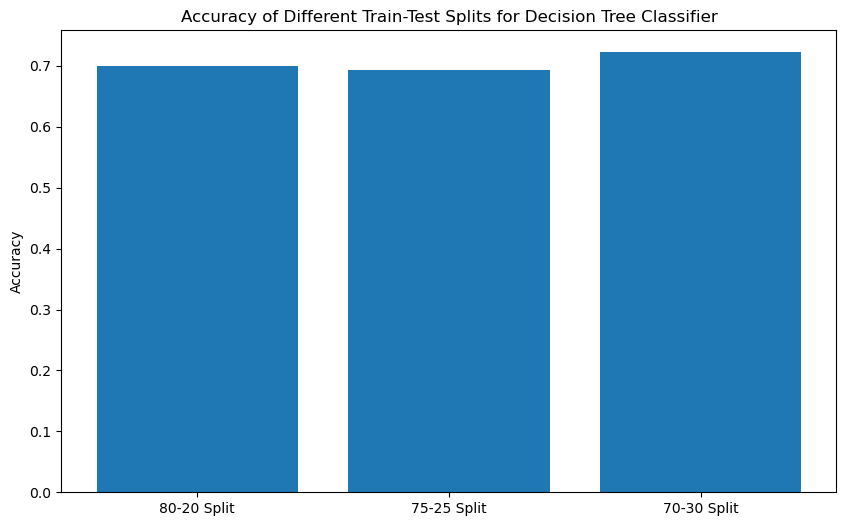

In [270]:
splits=['80-20 Split', '75-25 Split', '70-30 Split']
accuracies=[dtacc1,dtacc2,dtacc3]
plt.figure(figsize=(10, 6))
plt.bar(splits, accuracies)
plt.title('Accuracy of Different Train-Test Splits for Decision Tree Classifier')
plt.ylabel('Accuracy')
plt.show()

In [271]:
acc2=max(dtacc1,dtacc2,dtacc3)
print(acc2)

0.7222222222222222


# random forest

In [272]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.ensemble import RandomForestClassifier
rfmodel1=RandomForestClassifier()
rfmodel1.fit(x_train,y_train)
y_pred=rfmodel1.predict(x_test)
rfacc1=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(rfacc1)
print(cm)
print(cr)

0.75
[[24  8]
 [ 7 21]]
              precision    recall  f1-score   support

           0       0.77      0.75      0.76        32
           1       0.72      0.75      0.74        28

    accuracy                           0.75        60
   macro avg       0.75      0.75      0.75        60
weighted avg       0.75      0.75      0.75        60



In [273]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.ensemble import RandomForestClassifier
rfmodel2=RandomForestClassifier()
rfmodel2.fit(x_train,y_train)
y_pred=rfmodel2.predict(x_test)
rfacc2=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(rfacc2)
print(cm)
print(cr)

0.8133333333333334
[[31  7]
 [ 7 30]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        38
           1       0.81      0.81      0.81        37

    accuracy                           0.81        75
   macro avg       0.81      0.81      0.81        75
weighted avg       0.81      0.81      0.81        75



In [274]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.ensemble import RandomForestClassifier
rfmodel3=RandomForestClassifier()
rfmodel3.fit(x_train,y_train)
y_pred=rfmodel3.predict(x_test)
rfacc3=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(rfacc3)
print(cm)
print(cr)

0.8222222222222222
[[40  8]
 [ 8 34]]
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        48
           1       0.81      0.81      0.81        42

    accuracy                           0.82        90
   macro avg       0.82      0.82      0.82        90
weighted avg       0.82      0.82      0.82        90



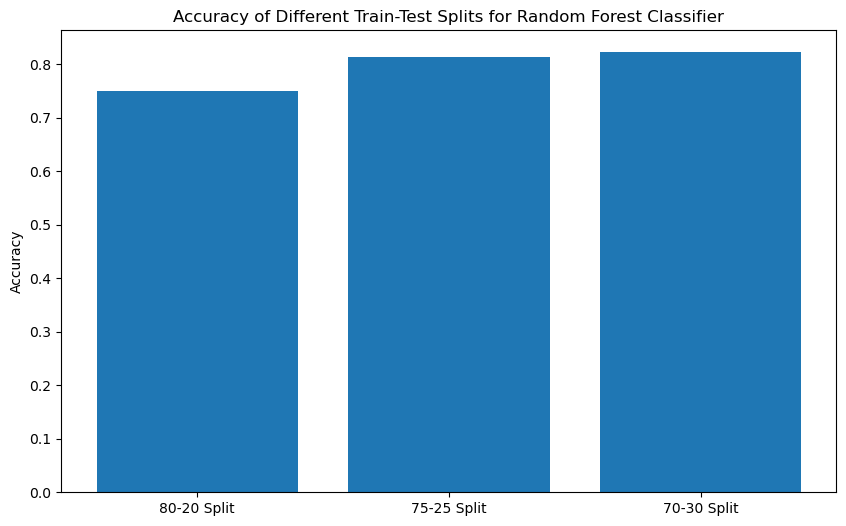

In [275]:
splits=['80-20 Split', '75-25 Split', '70-30 Split']
accuracies=[rfacc1,rfacc2,rfacc3]
plt.figure(figsize=(10, 6))
plt.bar(splits, accuracies)
plt.title('Accuracy of Different Train-Test Splits for Random Forest Classifier')
plt.ylabel('Accuracy')
plt.show()

In [276]:
new_data=[[69,1,0,160,234,1,2,131,0,0.1,1,1,0]]
new_predictions=rfmodel3.predict(new_data)
print('Predictions for the Unseen data:')
print(new_predictions)

Predictions for the Unseen data:
[0]


C:\Users\saira\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [277]:
new_data=[[66,0,0,138,282,1,2,174,0,1.4,1,1,0]]
new_predictions=rfmodel3.predict(new_data)
print('Predictions for the Unseen data:')
print(new_predictions)

Predictions for the Unseen data:
[1]


C:\Users\saira\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [278]:
print(rfacc1)
print(rfacc2)
print(rfacc3)

0.75
0.8133333333333334
0.8222222222222222


In [279]:
acc3=max(rfacc1,rfacc2,rfacc3)
print(acc3)

0.8222222222222222


# knn

In [280]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knmodel=KNeighborsClassifier(n_neighbors=5)
knmodel.fit(x_train,y_train)
y_pred=knmodel.predict(x_test)
knacc1=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(knacc1)
print(cm)
print(cr)

0.5666666666666667
[[20 12]
 [14 14]]
              precision    recall  f1-score   support

           0       0.59      0.62      0.61        32
           1       0.54      0.50      0.52        28

    accuracy                           0.57        60
   macro avg       0.56      0.56      0.56        60
weighted avg       0.57      0.57      0.57        60



In [281]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knmodel=KNeighborsClassifier(n_neighbors=5)
knmodel.fit(x_train,y_train)
y_pred=knmodel.predict(x_test)
knacc2=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(knacc2)
print(cm)
print(cr)

0.56
[[25 13]
 [20 17]]
              precision    recall  f1-score   support

           0       0.56      0.66      0.60        38
           1       0.57      0.46      0.51        37

    accuracy                           0.56        75
   macro avg       0.56      0.56      0.55        75
weighted avg       0.56      0.56      0.56        75



In [282]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.neighbors import KNeighborsClassifier
knmodel=KNeighborsClassifier(n_neighbors=5)
knmodel.fit(x_train,y_train)
y_pred=knmodel.predict(x_test)
knacc3=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(knacc3)
print(cm)
print(cr)

0.5888888888888889
[[33 15]
 [22 20]]
              precision    recall  f1-score   support

           0       0.60      0.69      0.64        48
           1       0.57      0.48      0.52        42

    accuracy                           0.59        90
   macro avg       0.59      0.58      0.58        90
weighted avg       0.59      0.59      0.58        90



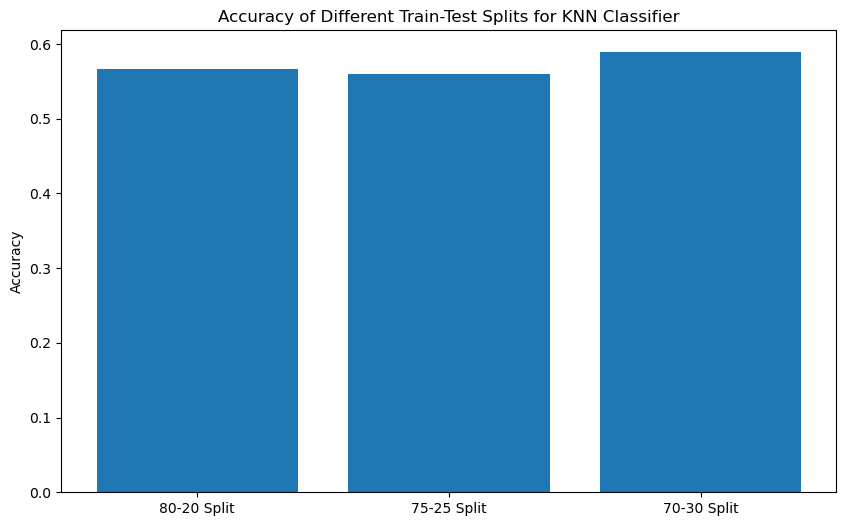

In [283]:
splits=['80-20 Split', '75-25 Split', '70-30 Split']
accuracies=[knacc1,knacc2,knacc3]
plt.figure(figsize=(10, 6))
plt.bar(splits, accuracies)
plt.title('Accuracy of Different Train-Test Splits for KNN Classifier')
plt.ylabel('Accuracy')
plt.show()

In [284]:
print(knacc1)
print(knacc2)
print(knacc3)

0.5666666666666667
0.56
0.5888888888888889


In [285]:
acc4=max(knacc1,knacc2,knacc3)
print(acc4)

0.5888888888888889


# Naive Bayes

In [286]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.naive_bayes import GaussianNB
nbmodel=GaussianNB()
nbmodel.fit(x_train,y_train)
y_pred=nbmodel.predict(x_test)
nbacc1=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(nbacc1)
print(cm)
print(cr)

0.7666666666666667
[[22 10]
 [ 4 24]]
              precision    recall  f1-score   support

           0       0.85      0.69      0.76        32
           1       0.71      0.86      0.77        28

    accuracy                           0.77        60
   macro avg       0.78      0.77      0.77        60
weighted avg       0.78      0.77      0.77        60



In [287]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
from sklearn.naive_bayes import GaussianNB
nbmodel=GaussianNB()
nbmodel.fit(x_train,y_train)
y_pred=nbmodel.predict(x_test)
nbacc2=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(nbacc2)
print(cm)
print(cr)

0.7866666666666666
[[27 11]
 [ 5 32]]
              precision    recall  f1-score   support

           0       0.84      0.71      0.77        38
           1       0.74      0.86      0.80        37

    accuracy                           0.79        75
   macro avg       0.79      0.79      0.79        75
weighted avg       0.79      0.79      0.79        75



In [288]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)
from sklearn.naive_bayes import GaussianNB
nbmodel=GaussianNB()
nbmodel.fit(x_train,y_train)
y_pred=nbmodel.predict(x_test)
nbacc3=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(nbacc3)
print(cm)
print(cr)

0.8
[[37 11]
 [ 7 35]]
              precision    recall  f1-score   support

           0       0.84      0.77      0.80        48
           1       0.76      0.83      0.80        42

    accuracy                           0.80        90
   macro avg       0.80      0.80      0.80        90
weighted avg       0.80      0.80      0.80        90



In [289]:
print(nbacc1)
print(nbacc2)
print(nbacc3)

0.7666666666666667
0.7866666666666666
0.8


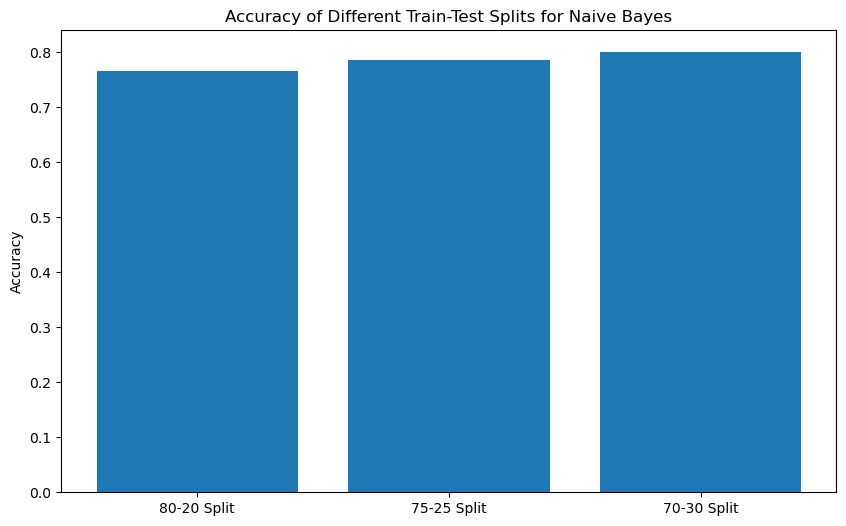

In [290]:
splits=['80-20 Split', '75-25 Split', '70-30 Split']
accuracies=[nbacc1,nbacc2,nbacc3]
plt.figure(figsize=(10, 6))
plt.bar(splits, accuracies)
plt.title('Accuracy of Different Train-Test Splits for Naive Bayes')
plt.ylabel('Accuracy')
plt.show()

In [291]:
acc5=max(nbacc1,nbacc2,nbacc3)
print(acc5)

0.8


# Ada Boost


In [292]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier(max_depth=1) 
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
abacc1=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(abacc1)
print(cm)
print(cr)

C:\Users\saira\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7
[[22 10]
 [ 8 20]]
              precision    recall  f1-score   support

           0       0.73      0.69      0.71        32
           1       0.67      0.71      0.69        28

    accuracy                           0.70        60
   macro avg       0.70      0.70      0.70        60
weighted avg       0.70      0.70      0.70        60



In [293]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier(max_depth=1) 
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
abacc2=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(abacc2)
print(cm)
print(cr)

C:\Users\saira\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.7466666666666667
[[28 10]
 [ 9 28]]
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        38
           1       0.74      0.76      0.75        37

    accuracy                           0.75        75
   macro avg       0.75      0.75      0.75        75
weighted avg       0.75      0.75      0.75        75



In [294]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
from sklearn.ensemble import AdaBoostClassifier
base_estimator = DecisionTreeClassifier(max_depth=1) 
model = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, learning_rate=1.0)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
abacc3=accuracy_score(y_test,y_pred)
cm=confusion_matrix(y_test, y_pred)
cr=classification_report(y_test, y_pred)
print(abacc3)
print(cm)
print(cr)

C:\Users\saira\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.8111111111111111
[[41  7]
 [10 32]]
              precision    recall  f1-score   support

           0       0.80      0.85      0.83        48
           1       0.82      0.76      0.79        42

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



In [295]:
print(abacc1)
print(abacc2)
print(abacc3)

0.7
0.7466666666666667
0.8111111111111111


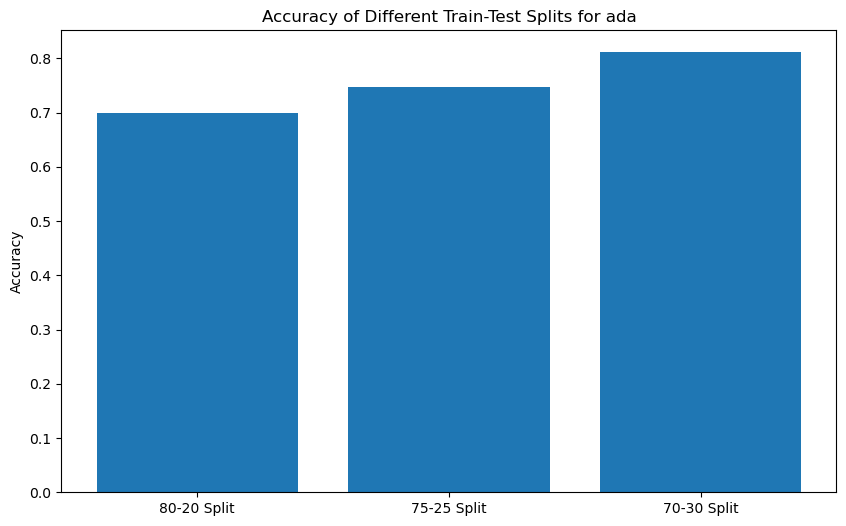

In [296]:
splits=['80-20 Split', '75-25 Split', '70-30 Split']
accuracies=[abacc1,abacc2,abacc3]
plt.figure(figsize=(10, 6))
plt.bar(splits, accuracies)
plt.title('Accuracy of Different Train-Test Splits for ada')
plt.ylabel('Accuracy')
plt.show()

In [297]:
acc6=max(abacc1,abacc2,abacc3)
print(acc6)

0.8111111111111111


In [298]:
print(acc1)
print(acc2)
print(acc3)
print(acc4)
print(acc5)
print(acc6)

0.8
0.7222222222222222
0.8222222222222222
0.5888888888888889
0.8
0.8111111111111111


In [299]:
bestmodel=max(acc1,acc2,acc3,acc4,acc5)
if(bestmodel==acc1):
    print("lr",bestmodel)
elif(bestmodel==acc2):
    print("dt",bestmodel)
elif(bestmodel==acc3):
    print("rf",bestmodel)
elif(bestmodel==acc4):
    print("knn",bestmodel)
elif(bestmodel==acc6):
    print("Ada",bestmodel)
else:
    print("nb",bestmodel)   

rf 0.8222222222222222


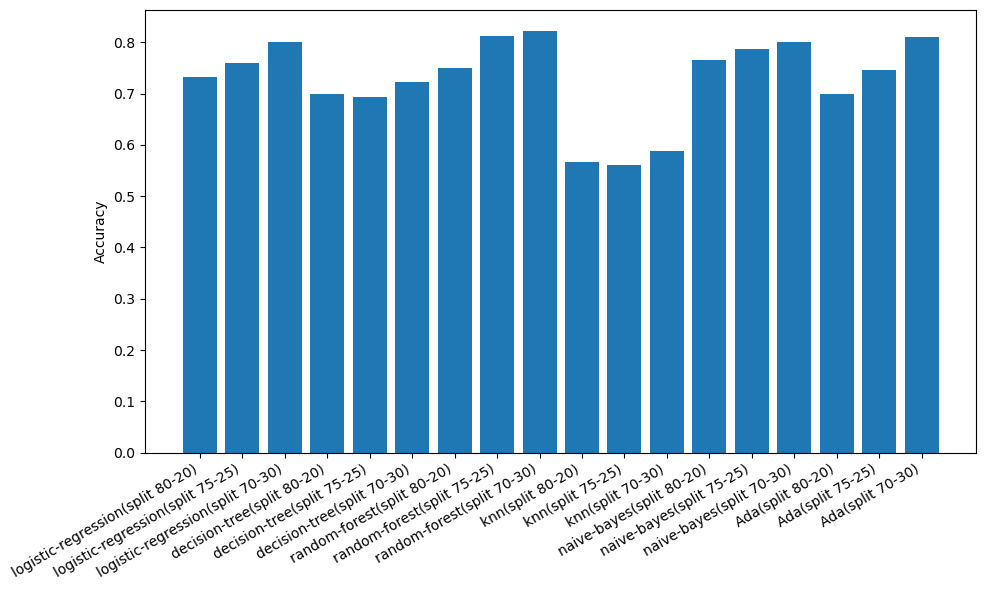

In [300]:
splits=['logistic-regression(split 80-20)','logistic-regression(split 75-25)','logistic-regression(split 70-30)',
       'decision-tree(split 80-20)','decision-tree(split 75-25)','decision-tree(split 70-30)',
        'random-forest(split 80-20)','random-forest(split 75-25)','random-forest(split 70-30)',
        'knn(split 80-20)','knn(split 75-25)','knn(split 70-30)',
        'naive-bayes(split 80-20)','naive-bayes(split 75-25)','naive-bayes(split 70-30)',
       'Ada(split 80-20)','Ada(split 75-25)','Ada(split 70-30)']
accuracies=[lracc1,lracc2,lracc3,dtacc1,dtacc2,dtacc3,rfacc1,rfacc2,rfacc3,knacc1,knacc2,knacc3,nbacc1,nbacc2,nbacc3,
            abacc1,abacc2,abacc3]
plt.figure(figsize=(10, 6))
plt.bar(splits, accuracies)
plt.ylabel('Accuracy')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

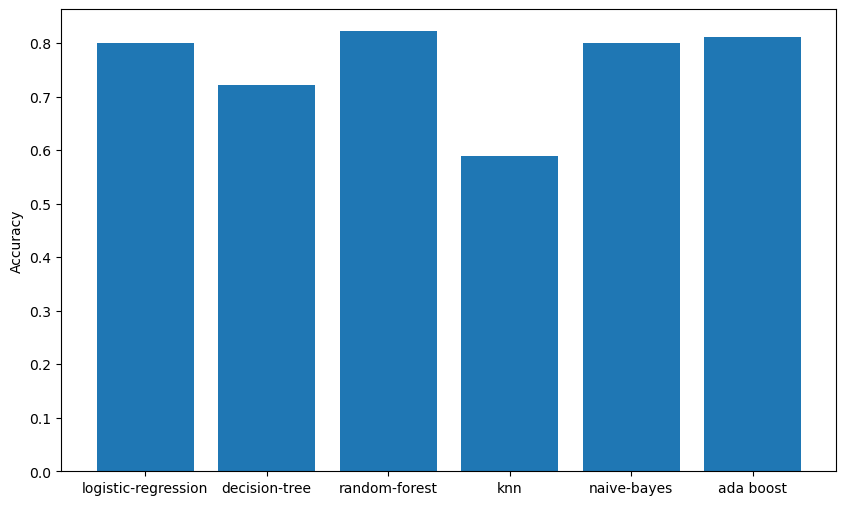

In [301]:
splits=['logistic-regression','decision-tree','random-forest','knn','naive-bayes','ada boost']
accuracies=[acc1,acc2,acc3,acc4,acc5,acc6]
plt.figure(figsize=(10, 6))
plt.bar(splits, accuracies)
plt.ylabel('Accuracy')
plt.show()

# Pickle

In [302]:
import pickle
with open('heart.pkl', 'wb') as file:
    pickle.dump(rfmodel3, file)